# **Persiapan**
Import Library

In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Import Data dalam Format CSV

In [10]:
# Membaca data CSV
data = pd.read_csv('Emisi.csv')
# Melihat 5 data pertama
print(data.head())

   Ville (L/100 km)  Route (L/100 km)  kombinasi (L/100 km)  Emisi CO2 (g/km)
0               8.1               6.5                   7.4               172
1               8.9               6.5                   7.8               181
2              11.1               8.3                   9.9               230
3              12.6               9.4                  11.2               263
4              13.8              11.2                  12.4               291


Gunakan pandas untuk membaca file CSV "Emisi.csv" dan tampilkan lima baris pertama. Dataset ini berisi data konsumsi bahan bakar dalam tiga kondisi berbeda (kota, jalan raya, dan kombinasi), serta tingkat emisi CO2 dalam gram per kilometer. Hasil output menampilkan konsumsi bahan bakar dalam liter per 100 km dan emisi karbon dioksida dalam gram per km.

In [11]:
data.rename(columns={'Ville (L/100 km)': 'X', 'Emisi CO2 (g/km)': 'Y' }, inplace=True)
print(data)

        X  Route (L/100 km)  kombinasi (L/100 km)    Y
0     8.1               6.5                   7.4  172
1     8.9               6.5                   7.8  181
2    11.1               8.3                   9.9  230
3    12.6               9.4                  11.2  263
4    13.8              11.2                  12.4  291
..    ...               ...                   ...  ...
637   9.7               7.5                   8.7  205
638  10.7               8.1                   9.5  223
639  10.1               7.8                   9.1  213
640  10.0               7.8                   9.0  212
641  11.5               9.0                  10.4  244

[642 rows x 4 columns]


Sederhananya, ubah nama kolom "Ville (L/100 km)" menjadi "X" dan "Emisi CO2 (g/km)" menjadi "Y" menggunakan data.rename(). Perubahan ini diterapkan langsung pada dataset dengan inplace=True, sehingga tidak perlu membuat salinan baru. Dengan penamaan yang lebih ringkas, analisis data dapat dilakukan dengan lebih mudah.

# **Analisis**
Menghitung Matriks Korelasi

In [12]:
# Menghitung matriks korelasi
correlation_matrix = data.corr()
print(correlation_matrix)

                             X  Route (L/100 km)  kombinasi (L/100 km)  \
X                     1.000000          0.909671              0.986990   
Route (L/100 km)      0.909671          1.000000              0.961539   
kombinasi (L/100 km)  0.986990          0.961539              1.000000   
Y                     0.975617          0.951061              0.988786   

                             Y  
X                     0.975617  
Route (L/100 km)      0.951061  
kombinasi (L/100 km)  0.988786  
Y                     1.000000  


Gunakan data.corr() untuk menghitung matriks korelasi dalam dataset, yang menggambarkan hubungan linear antar variabel. Nilai korelasi berada dalam rentang -1 hingga 1, di mana semakin mendekati 1 menandakan hubungan positif yang kuat, sementara semakin mendekati -1 menunjukkan hubungan negatif yang kuat. Berdasarkan hasilnya, variabel X (konsumsi di kota), Route (di jalan raya), dan Kombinasi memiliki korelasi tinggi dengan Y (Emisi CO2).

Membuat Matriks Korelasi

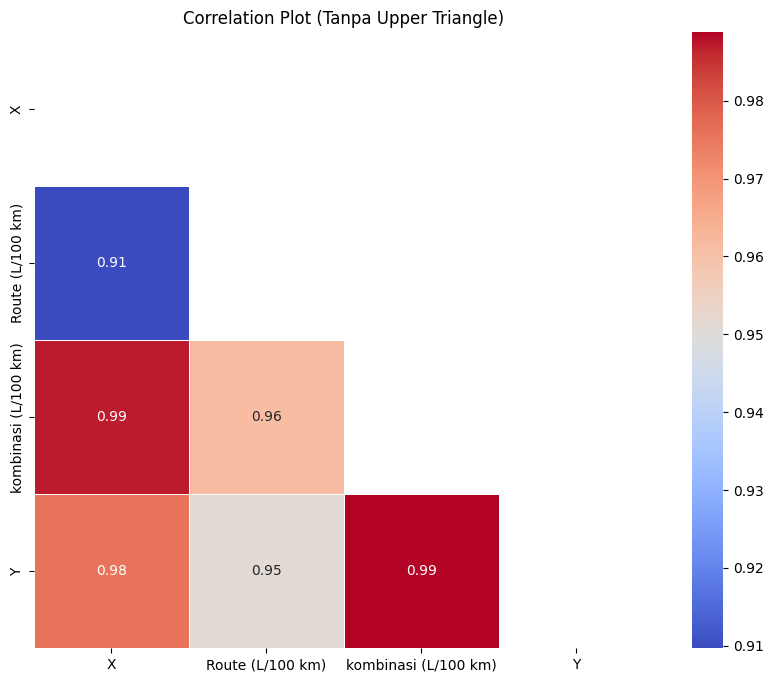

In [13]:
# Membuat mask untuk upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Membuat heatmap tanpa upper triangle
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot (Tanpa Upper Triangle)')
plt.show()

Kode tersebut menghasilkan heatmap untuk memvisualisasikan korelasi antar variabel dalam dataset, namun hanya menampilkan bagian segitiga bawah (lower triangle) dengan menggunakan mask.


Membuat Model Regresi Sederhana

<Axes: xlabel='X', ylabel='Y'>

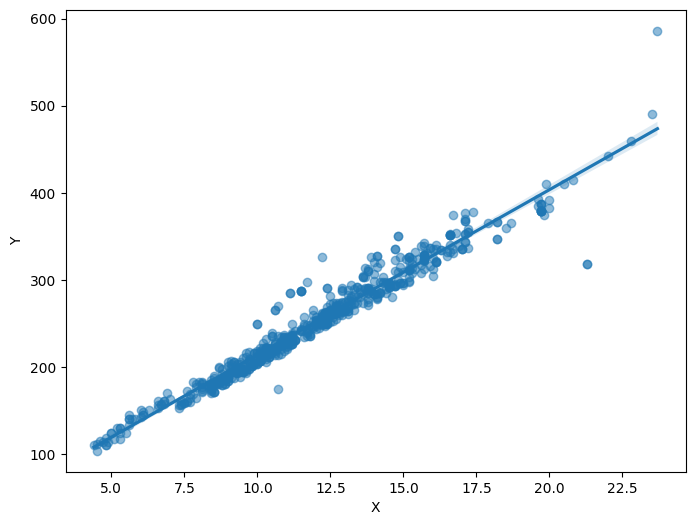

In [14]:
# Plot scatterplot dengan regresi
plt.figure(figsize=(8, 6))
sns.regplot(x="X", y="Y", data=data, scatter_kws={"alpha": 0.5})

Variabel x mewakili X (konsumsi bahan bakar di kota), sedangkan y mewakili Y (emisi CO2). Plot ini menggambarkan hubungan antara kedua variabel tersebut, dengan garis regresi yang secara otomatis ditambahkan untuk menunjukkan tren linear. Dari hasil visualisasi, terlihat bahwa X dan Y memiliki korelasi positif yang kuat, di mana peningkatan konsumsi bahan bakar sejalan dengan meningkatnya emisi CO2.

Membuat Model Regresi Sederhana #2

In [16]:
from sklearn.linear_model import LinearRegression

# Pisahkan variabel independen (X) dan dependen (Y)
X = data[["X"]]  # Perlu diubah ke bentuk 2D
Y = data["Y"]


# Menambahkan konstanta ke model (intercept)
X = sm.add_constant(X)

In [17]:
# Membuat model regresi linear
model = sm.OLS(Y, X).fit()

# Melihat ringkasan model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 1.265e+04
Date:                Thu, 06 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:27:57   Log-Likelihood:                -2618.3
No. Observations:                 642   AIC:                             5241.
Df Residuals:                     640   BIC:                             5250.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.7691      2.096     11.815      0.000      20.652      28.886
X             18.9382      0.168    112.454      0.000      18.608      19.269
==============================================================================
Omnibus:                      176.815   Durbin-Watson:                   1.308
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8794.363
Skew:                           0.308   Prob(JB):                         0.00
Kurtosis:                      21.121   Cond. No.                         46.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

Pada baris pertama (178.168794), ketika konsumsi bahan bakar X = 8.1, model memperkirakan emisi CO2 sekitar 178.17 g/km (dibulatkan). Seiring dengan meningkatnya konsumsi bahan bakar, prediksi emisi CO2 juga ikut naik, sesuai dengan hubungan positif antara X dan Y. Hasil ini mengindikasikan bahwa model dapat dimanfaatkan untuk memperkirakan emisi kendaraan berdasarkan konsumsi bahan bakarnya.

In [18]:
print(model)
prediksi = model.predict(X)
prediksi

,0
0,178.168794
1,193.319386
2,234.983513
3,263.390873
4,286.116761
...,...
637,208.469978
638,227.408218
639,216.045274
640,214.151450


**dtype**: float64


Pada baris pertama (178.168794), saat konsumsi bahan bakar X = 8.1, model memprediksi emisi CO2 sekitar 178.17 g/km (dibulatkan). Nilai prediksi ini meningkat seiring bertambahnya konsumsi bahan bakar, mencerminkan hubungan positif antara X dan Y. Hasil ini menunjukkan bahwa model dapat digunakan untuk estimasi emisi kendaraan berdasarkan konsumsi bahan bakarnya.

Visualisasi Hasil Prediksi

In [19]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression()

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org**

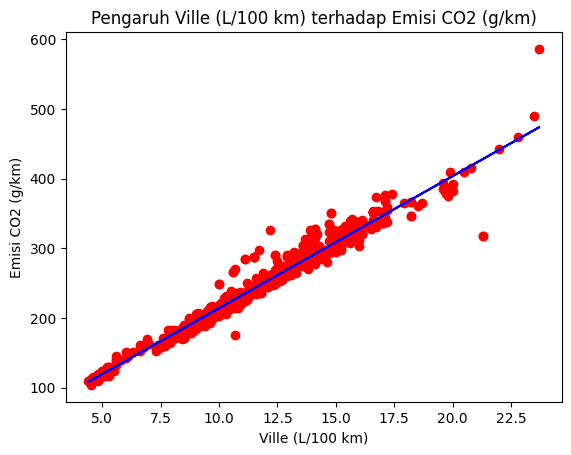

In [20]:
plt.scatter(X.X, Y, color = 'red')
plt.plot(X.X, lin_reg.predict(X), color = 'blue')
plt.title('Pengaruh Ville (L/100 km) terhadap Emisi CO2 (g/km)')
plt.xlabel('Ville (L/100 km)')
plt.ylabel('Emisi CO2 (g/km)')
plt.show()

Kode ini menghasilkan visualisasi regresi linear yang menggambarkan hubungan antara konsumsi bahan bakar di kota (X) dan emisi CO2 (Y). Titik merah merepresentasikan data asli dari dataset dalam bentuk scatter plot, sementara garis biru menunjukkan model regresi linear. Garis biru yang mengikuti pola titik merah menegaskan bahwa semakin tinggi konsumsi bahan bakar, semakin besar emisi CO2, sesuai dengan hasil regresi sebelumnya.

# **Evaluasi**

In [21]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Evaluasi model
mse = mean_squared_error(Y, prediksi)
mae = mean_absolute_error(Y, prediksi)
r2 = r2_score(Y, prediksi)

# Cetak hasil evaluasi
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 204.1479
Mean Absolute Error (MAE): 9.0293
R-squared (R²): 0.9518


Setelah mengevaluasi model regresi linear menggunakan metrik MSE, MAE, dan R², diketahui bahwa rata-rata selisih antara nilai prediksi dan aktual sekitar 9 g/km CO₂ (berdasarkan MAE). Meskipun masih terdapat kesalahan, namun nilainya cukup kecil dibandingkan dengan skala data. Sementara itu, R² menunjukkan tingkat akurasi yang cukup baik, yaitu sekitar 95%.

# **Membuat Model-Model Regresi Polynomial**

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y)

LinearRegression()

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

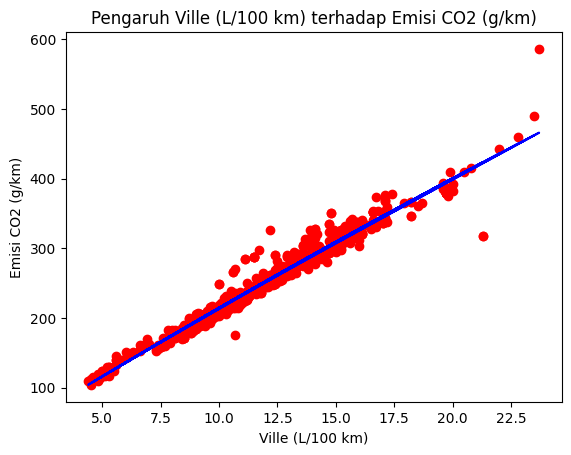

In [25]:
plt.scatter(X.X, Y, color = 'red')
plt.plot(X.X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Pengaruh Ville (L/100 km) terhadap Emisi CO2 (g/km)')
plt.xlabel('Ville (L/100 km)')
plt.ylabel('Emisi CO2 (g/km)')
plt.show()

Kode ini membuat visualisasi regresi polinomial untuk menganalisis hubungan antara konsumsi bahan bakar di kota (X) dan emisi CO2 (Y). Titik merah merepresentasikan data asli dalam bentuk scatter plot, sedangkan garis biru menunjukkan hasil regresi polinomial yang lebih fleksibel dibandingkan regresi linear.

In [26]:
Y_poly = lin_reg_2.predict(X_poly)
Y_poly

array([177.55649707, 193.16562068, 235.63198483, 264.20057737,
       286.83025876, 233.71629137, 239.45920152, 239.45920152,
       258.51188027, 214.48290248, 224.1169729 , 229.88073422,
       239.45920152, 325.95053915, 322.25120965, 314.8358697 ,
       206.75062473, 216.41249672, 220.26751497, 216.41249672,
       224.1169729 , 216.41249672, 214.48290248, 231.79920784,
       231.79920784, 231.79920784, 264.20057737, 227.96087052,
       247.09695396, 216.41249672, 226.03961675, 226.03961675,
       252.81067247, 271.76604575, 249.00291687, 269.87676378,
       277.42555122, 346.19746086, 346.19746086, 346.19746086,
       329.64430835, 222.19293897, 233.71629137, 233.71629137,
       258.51188027, 249.00291687, 260.40950272, 260.40950272,
       327.79811879, 264.20057737, 264.20057737, 327.79811879,
       329.64430835, 348.02974964, 348.02974964, 204.8140801 ,
       193.16562068, 206.75062473, 189.27168024, 189.27168024,
       277.42555122, 312.97855952, 298.07003524, 303.67

Output ini menampilkan array prediksi untuk nilai Y berdasarkan model regresi polinomial yang telah dibuat. Y_poly merupakan array yang berisi estimasi nilai variabel dependen (Emisi CO2) setelah melalui transformasi polinomial dan diprediksi oleh model. Nilai-nilai dalam array ini menunjukkan perkiraan emisi CO2 berdasarkan input X yang telah diproses dengan regresi polinomial.

In [27]:
# Evaluasi model
mse_poly = mean_squared_error(Y, Y_poly)
mae_poly = mean_absolute_error(Y, Y_poly)
r2_poly = r2_score(Y, Y_poly)

# Cetak hasil evaluasi
print(f"Mean Squared Error (MSE Poly): {mse_poly:.4f}")
print(f"Mean Absolute Error (MAE Poly): {mae_poly:.4f}")
print(f"R-squared (R² Poly): {r2_poly:.4f}")

Mean Squared Error (MSE Poly): 202.7943
Mean Absolute Error (MAE Poly): 9.0976
R-squared (R² Poly): 0.9521


Setelah mengevaluasi model regresi polinomial dengan metrik MSE, MAE, dan R², ditemukan bahwa rata-rata selisih antara nilai prediksi dan aktual sekitar 9 g/km CO₂ (MAE). Meskipun masih terdapat sedikit kesalahan, nilainya cukup kecil dibandingkan dengan skala data. Sementara itu, R² menunjukkan tingkat akurasi yang cukup tinggi, yaitu sekitar 95%.